# Python notebook for the two-degree polynomial Bayes classifier example

### **1. Load necessary modules** ###

In [7]:
# %load "/Users/mslawsk3/Dropbox/gmu/teaching/stat672_2022/demo/polynomial.py"
# im
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### **2. Generate sample of size 1000 from data-generating distribution**### 

In [8]:
# probability of Y=1 given X=x 
def PYgivenX(x):
    return(0.9 * np.logical_or(x < 0.2, x>0.8) + 0.2*(np.logical_and(x >= 0.2, x <= 0.8)))
    

 
# sample size
n = 1000  
 
# generate thousand points from the data-generating distribution
np.random.seed(0)

X = np.random.rand(n)

pYs = PYgivenX(X)

Y = np.random.binomial(1, pYs, n)
Y = 2*Y-1

### **3. Fit classifiers (logistic regression based on polynomial features of varying degree)** ### 
Aside: note that we cannot efficiently minimize the 0-1 loss, hence we use the logistic loss as surrogate

In [9]:
F1 = np.transpose(np.vstack([np.ones(n), X]))
F2 = np.transpose(np.vstack([np.ones(n), X, X**2]))
F5 = np.transpose(np.vstack([np.ones(n), X, X**2, X**3, X**4, X**5]))


logreg1 = linear_model.LogisticRegression(C=1e5, fit_intercept=False)
logreg2= linear_model.LogisticRegression(C=1e5, fit_intercept=False)
logreg5= linear_model.LogisticRegression(C=1e5, fit_intercept=False)


logreg1.fit(F1, Y)
logreg2.fit(F2, Y)
logreg5.fit(F5, Y)

LogisticRegression(C=100000.0, fit_intercept=False)

**Plot 0: Observed (X,Y) sample**

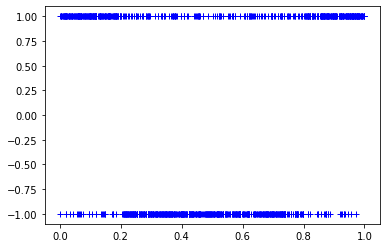

In [10]:
plt.plot(X, Y, 'b+')

**Plot 1: polynomial of degree 1 misclassification error + fit**

0.439

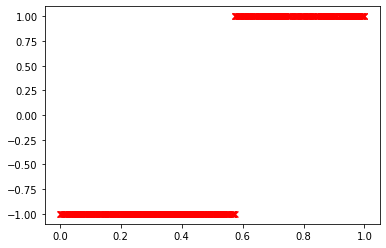

In [12]:
plt.plot(X, logreg1.predict(F1), 'rx')
np.mean(logreg1.predict(F1) != Y)

**Plot 2: polynomial of degree 2 misclassification error + fit**

0.203

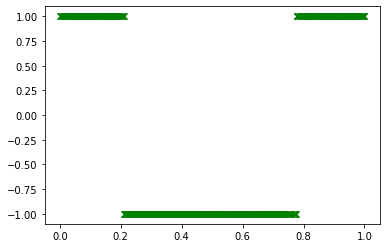

In [13]:
plt.plot(X, logreg2.predict(F2), 'gx')
np.mean(logreg2.predict(F2) != Y)

**Plot 3: polynomial of degree 5 misclassification error + fit**

0.202

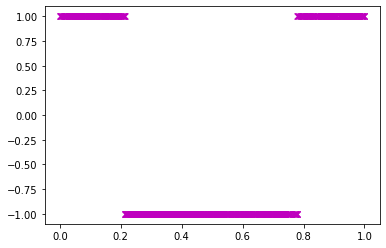

In [16]:
plt.plot(X, logreg5.predict(F5), 'mx')
np.mean(logreg5.predict(F5) != Y)

### **4. Full-scale simulation** ### 

In [17]:
# now more complete simulation, with varying sample sizes 
# -- comparing empirical misclassfication error and generalization misclassication error on independent test samples (1,000)

nrepl = 50; # number of replicates per simulation
ns = [10, 20, 50, 100, 200, 500, 1000] # sample sizes (from tiny = 10 to 1,000)

errs_emp1 = np.zeros([len(ns), nrepl]);  # empirical errors
errs_gen1 = np.zeros([len(ns), nrepl]);  # generalization errors (on an independent data set from the same distribution) 

errs_emp2 = np.zeros([len(ns), nrepl]);  # analogous for polynomial of degree 2
errs_gen2 = np.zeros([len(ns), nrepl]);

errs_emp5 = np.zeros([len(ns), nrepl]);  # analogous for polynomial of degree 5
errs_gen5 = np.zeros([len(ns), nrepl]);

np.random.seed(0)

for i in np.arange(len(ns)):
    for j in np.arange(nrepl):
        n = ns[i]
        
        # for training
        X = np.random.rand(n)
    
        pYs = PYgivenX(X)
    
        Y = np.random.binomial(1, pYs, n)
        Y = 2*Y-1
        
        # independent sample of size 1000 for generalization error 
        Xprime = np.random.rand(1000)
    
        pYsprime = PYgivenX(Xprime)
    
        Yprime = np.random.binomial(1, pYsprime, 1000)
        Yprime = 2*Yprime-1
    
        F1 = np.transpose(np.vstack([np.ones(n), X]))
        F2 = np.transpose(np.vstack([np.ones(n), X, X**2]))
        F5 = np.transpose(np.vstack([np.ones(n), X, X**2, X**3, X**4, X**5]))
        
        F1prime = np.transpose(np.vstack([np.ones(1000), Xprime]))
        F2prime = np.transpose(np.vstack([np.ones(1000), Xprime, Xprime**2]))
        F5prime = np.transpose(np.vstack([np.ones(1000), Xprime, Xprime**2, 
                                          Xprime**3, Xprime**4, Xprime**5]))
    
        logreg1 = linear_model.LogisticRegression(C=1e5, fit_intercept=False)
        logreg2 = linear_model.LogisticRegression(C=1e5, fit_intercept=False)
        logreg5 = linear_model.LogisticRegression(C=1e5, fit_intercept=False)
    
        logreg1.fit(F1, Y)
        logreg2.fit(F2, Y)
        logreg5.fit(F5, Y)
    
        # empirical errors
        errs_emp1[i,j] = np.mean(logreg1.predict(F1) != Y)
        errs_emp2[i,j] = np.mean(logreg2.predict(F2) != Y)
        errs_emp5[i,j] = np.mean(logreg5.predict(F5) != Y)
        
        # generalization errors 
        errs_gen1[i,j] = np.mean(logreg1.predict(F1prime) != Yprime)
        errs_gen2[i,j] = np.mean(logreg2.predict(F2prime) != Yprime)
        errs_gen5[i,j] = np.mean(logreg5.predict(F5prime) != Yprime)
        

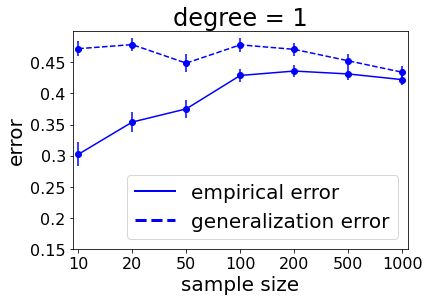

In [18]:
# degree 1
ax = plt.subplot()     
 
ax.errorbar(np.arange(1,len(ns)+1), np.mean(errs_emp1, 1), yerr=np.std(errs_emp1, 1)/np.sqrt(nrepl), fmt='-ob')
ax.errorbar(np.arange(1,len(ns)+1), np.mean(errs_gen1, 1), yerr=np.std(errs_gen1, 1)/np.sqrt(nrepl), fmt='--ob')

ax.set_yticks(np.arange(0.15, 0.5, 0.05))
ax.set_xticks(np.arange(1, len(ns)+1))
ax.set_xticklabels(ns, fontsize = 16)
ax.set_yticklabels(['0.15', '0.2' , '0.25', '0.3' , '0.35', '0.4' , '0.45'], fontsize = 16)
ax.set_xlim([0.9, 7.1])

ax.set_xlabel("sample size", fontsize = 20)
ax.set_ylabel("error", fontsize = 20)
ax.set_title("degree = 1", fontsize = 24)

plt.legend([plt.Line2D([0], [0], ls = '-', lw = 2, color="b"), plt.Line2D([0], [0], ls = '--', lw = 3, color="blue")], ["empirical error", "generalization error"], loc = "lower right", fontsize = 20) 

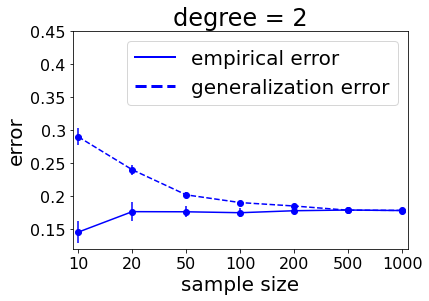

In [19]:
# degree 2

ax = plt.subplot() 
ax.errorbar(np.arange(1,len(ns)+1), np.mean(errs_emp2, 1), yerr=np.std(errs_emp2, 1)/np.sqrt(nrepl), fmt='-ob')
ax.errorbar(np.arange(1,len(ns)+1), np.mean(errs_gen2, 1), yerr=np.std(errs_gen2, 1)/np.sqrt(nrepl), fmt='--ob')

ax.set_yticks(np.arange(0.15, 0.5, 0.05))
ax.set_xticks(np.arange(1, len(ns)+1))
ax.set_xticklabels(ns, fontsize = 16)
ax.set_yticklabels(['0.15', '0.2' , '0.25', '0.3' , '0.35', '0.4' , '0.45'], fontsize = 16)
ax.set_xlim([0.9, 7.1])

ax.set_xlabel("sample size", fontsize = 20)
ax.set_ylabel("error", fontsize = 20)
ax.set_title("degree = 2", fontsize = 24)

plt.legend([plt.Line2D([0], [0], ls = '-', lw = 2, color="b"), plt.Line2D([0], [0], ls = '--', lw = 3, color="blue")], ["empirical error", "generalization error"], loc = "upper right", fontsize = 20)

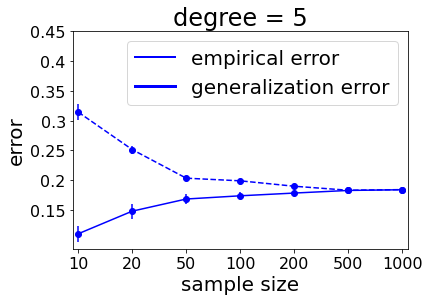

In [20]:
# degree 5
ax = plt.subplot() 
ax.errorbar(np.arange(1,len(ns)+1), np.mean(errs_emp5, 1), yerr=np.std(errs_emp5, 1)/np.sqrt(nrepl), fmt='-ob')
ax.errorbar(np.arange(1,len(ns)+1), np.mean(errs_gen5, 1), yerr=np.std(errs_gen5, 1)/np.sqrt(nrepl), fmt='--ob')

ax.set_yticks(np.arange(0.15, 0.5, 0.05))
ax.set_xticks(np.arange(1, len(ns)+1))
ax.set_xticklabels(ns, fontsize = 16)
ax.set_yticklabels(['0.15', '0.2' , '0.25', '0.3' , '0.35', '0.4' , '0.45'], fontsize = 16)
ax.set_xlim([0.9, 7.1])

ax.set_xlabel("sample size", fontsize = 20)
ax.set_ylabel("error", fontsize = 20)
ax.set_title("degree = 5", fontsize = 24)

plt.legend([plt.Line2D([0], [0], ls = '-', lw = 2, color="b"), plt.Line2D([0], [0], ls = '-', lw = 3, color="blue")], ["empirical error", "generalization error"], loc = "upper right", fontsize = 20) 